In [2]:
import os
import numpy as np
import xarray as xa
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.colors as mpcrs
from pylibs.custom_colormaps import aod_clrmap
from pylibs.plot_utils import setupax_2dmap, set_size
from pylibs.utils import setup_cmap

In [3]:
plts_savedir = '/glade/work/swei/projects/mmm.pace_aod/plots/gridded'
infile = '/glade/work/swei/projects/mmm.pace_aod/aod_obs_stats.m2.202411.nc4'
if not os.path.exists(plts_savedir):
    os.makedirs(plts_savedir)
axe_w = 6.4; axe_h = 4
quality = 600
save = 1
show = 0

In [4]:
base = 'pace_aod'
plotting_list = [
    'obs_count', 
    # 'obs_mean', 'obs_std',
    # 'hofx_mean', 'hofx_std',
    # 'omb_mean', 'omb_std',
]
plot_stats_dict = {
    'obs_count': {'vmin': 0, 'vmax': 2000, 'cmap': 'hot_r', 'diffRatio': 1.},
    'obs_mean': {'vmin': 0., 'vmax': 2., 'cmap': None, 'diffRatio': 4.},
    'hofx_mean': {'vmin': 0., 'vmax': 2., 'cmap': None, 'diffRatio': 4.},
    'omb_mean': {'vmin': -1., 'vmax': 1., 'cmap': 'bwr', 'diffRatio': 4.},
    'obs_std': {'vmin': 0., 'vmax': 2., 'cmap': 'hot_r', 'diffRatio': 2.},
    'hofx_std': {'vmin': 0., 'vmax': 2., 'cmap': 'hot_r', 'diffRatio': 2.},
    'omb_std': {'vmin': 0., 'vmax': 0.5, 'cmap': 'hot_r', 'diffRatio': 2.},
}

In [4]:
ds = xa.open_dataset(infile)

In [5]:
def get_process_dataset(ds, vartype):
    outlist = []
    inlist = list(ds.data_vars)
    for tmp in inlist:
        if vartype in tmp:
            outlist.append(tmp)
    outds = ds[outlist]
    return outds, outlist

In [6]:
cornerll = [-1., 1., -1., 1.]

In [5]:
def plot_full(pltds, plot_dict, title, plot_outname):
    if plot_dict['cmap'] is None:
        cnlvs = [0., 0.05, 0.1, 0.15, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.5, 2.5]
        clridx = [2, 4, 5, 7, 8, 9, 10, 12, 14, 15, 16, 17, 18]
        tuplelst, clrmap = setup_cmap('precip3_16lev', cnlvs, clridx)
        clr_norm = mpcrs.BoundaryNorm(cnlvs, len(clridx), extend='both')
        p = pltds.plot(
            levels=cnlvs,
            size=4,
            aspect=1.6,
            subplot_kws=dict(
                projection=ccrs.PlateCarree()
            ),
            cmap=clrmap,
            norm=clr_norm,
            extend='both',
            add_colorbar=True,
            cbar_kwargs=dict(
                label=None,
                pad=0.1,
                fraction=0.025,
                ticks=cnlvs,
            ),
        )
    else:
        p = pltds.plot(
            vmin=plot_dict['vmin'],
            vmax=plot_dict['vmax'],
            extend='both',
            size=4,
            aspect=1.6,
            subplot_kws=dict(
                projection=ccrs.PlateCarree()
            ),
            cmap= plot_dict['cmap'],
            add_colorbar=True,
            cbar_kwargs=dict(
                label=None,
                pad=0.1,
                fraction=0.025,
            ),
        )
    p.axes.gridlines(draw_labels=True)
    p.axes.coastlines(color='grey')
    p.axes.set_title(title)
    if save:
        p.figure.savefig(plot_outname, dpi=quality)
    if show:
        plt.show()
    plt.close()

In [8]:
def plot_diff(pltds, plot_dict, title, plot_outname):
    vmin = -plot_dict['vmax'] / plot_dict['diffRatio']
    vmax = plot_dict['vmax'] / plot_dict['diffRatio']
    p = pltds.plot(
        # center=0.,
        extend='both',
        vmin=vmin,
        vmax=vmax,
        size=4,
        aspect=1.6,
        subplot_kws=dict(
            projection=ccrs.PlateCarree()
        ),
        cmap='bwr',
        add_colorbar=True,
        cbar_kwargs=dict(
            label=None,
            pad=0.1,
            fraction=0.025,
        ),
    )
    p.axes.gridlines(draw_labels=True)
    p.axes.coastlines(color='grey')
    p.axes.set_title(title)
    if save:
        p.figure.savefig(plot_outname, dpi=quality)
    if show:
        plt.show()
    plt.close()

In [11]:
for varType in plotting_list:
    baseVar = f'{base}_{varType}'
    process_ds, process_list = get_process_dataset(ds, varType)
    plot_dict = plot_stats_dict[varType]
    if 'count' in varType:
        wrkds = process_ds.sum(dim='time')
    else:
        wrkds = process_ds.mean(dim='time')

    for plotVar in process_list:
        data = plotVar.replace("_"+varType, "")
        print(f'Prorcessing {plotVar}')
        plot_outname = f'{plts_savedir}/{varType}.{data}.202411.png'
        title = f'{plotVar.replace("_"+varType, "")}'
        plot_full(wrkds[plotVar], plot_dict, title, plot_outname)
        if plotVar != baseVar:
            plot_outname = f'{plts_savedir}/{varType}.{base}-{data}.202411.png'
            title = f'{base} - {plotVar.replace("_"+varType, "")}'
            plot_diff(wrkds[baseVar] - wrkds[plotVar], plot_dict, title, plot_outname)
print("Process Finished")

Prorcessing modis_terra_aod_obs_count
Prorcessing modis_aqua_aod_obs_count
Prorcessing pace_aod_obs_count
Prorcessing viirs_aod_dt_npp_obs_count
Prorcessing viirs_aod_dt_n20_obs_count
Prorcessing viirs_aod_db_npp_obs_count
Prorcessing viirs_aod_db_n20_obs_count
Process Finished


In [10]:
m2mean_file = '/glade/work/swei/projects/mmm.pace_aod/merra2.mean_aod.202411.nc'
m2ds = xa.open_dataset(m2mean_file)
pltds = m2ds['M2T1NXAER_5_12_4_TOTEXTTAU']
m2plotname = f'{plts_savedir}/hofx_mean.merra2.202411.png'
plot_full(pltds, plot_stats_dict['obs_mean'], 'MERRA-2 TOTEXTTAU', m2plotname)

<xarray.DataArray 'M2T1NXAER_5_12_4_TOTEXTTAU' (lat: 361, lon: 576)> Size: 832kB
[207936 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 5kB -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
Attributes:
    fmissing_value:        1000000000000000.0
    standard_name:         Total Aerosol Extinction AOT [550 nm]
    units:                 1
    vmax:                  1000000000000000.0
    vmin:                  -1000000000000000.0
    quantity_type:         Aerosol Optical Depth
    product_short_name:    M2T1NXAER
    product_version:       5.12.4
    long_name:             Total Aerosol Extinction AOT 550 nm, time average
    cell_methods:          time: mean
    latitude_resolution:   0.5
    longitude_resolution:  0.625

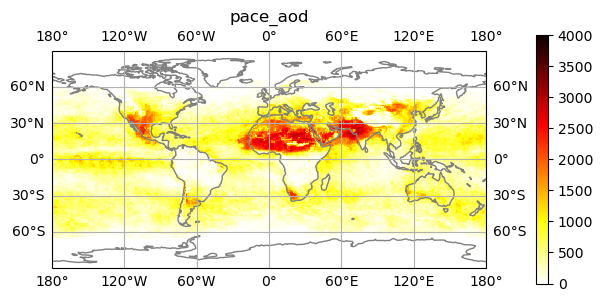

In [33]:
pltds = ds['pace_aod_obs_count'].sum(dim='time')
p = pltds.plot(
    vmin=0.,
    vmax=4000.,
    size=4,
    aspect=1.6,
    subplot_kws=dict(
        projection=ccrs.PlateCarree()
    ),
    cmap='hot_r',
    add_colorbar=True,
    cbar_kwargs=dict(
        label=None,
        pad=0.1,
        fraction=0.025,
    ),
)
p.axes.gridlines(draw_labels=True)
p.axes.coastlines(color='grey')
p.axes.set_title(f'{base}')
plot_outname = f'{plts_savedir}/{base}.202411.png'
p.figure.savefig(plot_outname, dpi=quality)

In [34]:
plt.close()

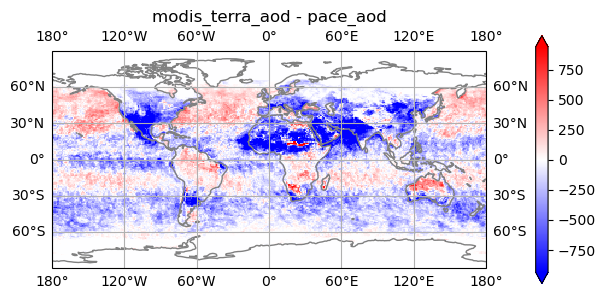

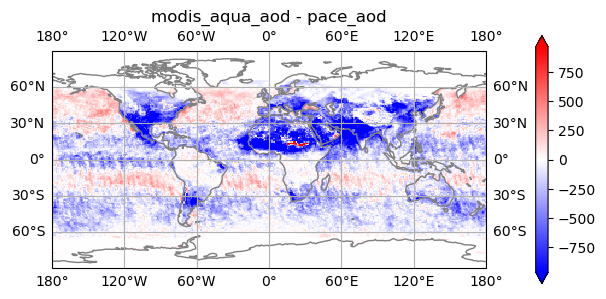

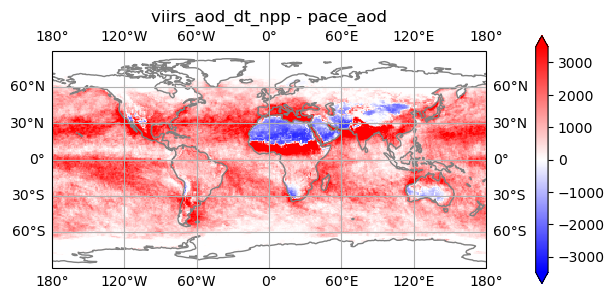

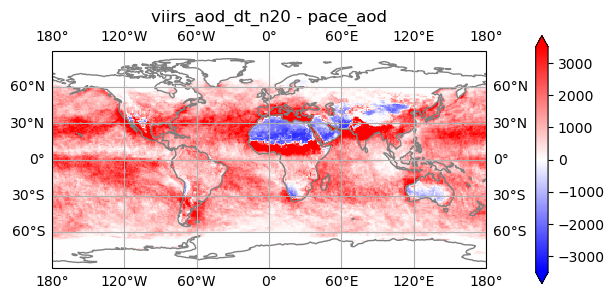

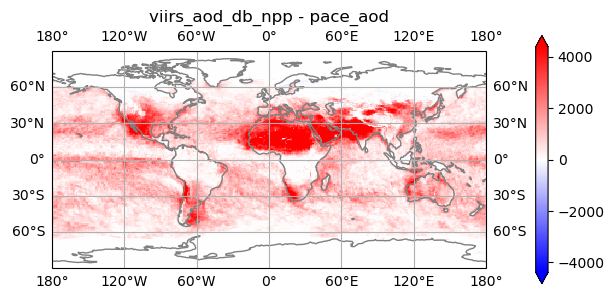

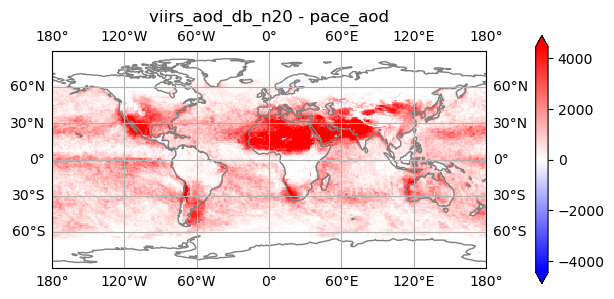

In [41]:
for obsname in obsname_list:
    pltds = sum_ds[obsname] - sum_ds[base]
    p = pltds.plot(
        center=True,
        extend='both',
        robust=True,
        size=4,
        aspect=1.6,
        subplot_kws=dict(
            projection=ccrs.PlateCarree()
        ),
        cmap='bwr',
        add_colorbar=True,
        cbar_kwargs=dict(
            label=None,
            pad=0.1,
            fraction=0.025,
        ),
    )
    p.axes.gridlines(draw_labels=True)
    p.axes.coastlines(color='grey')
    p.axes.set_title(f'{obsname} - {base}')
    plot_outname = f'{plts_savedir}/{obsname}-{base}.202411.png'
    p.figure.savefig(plot_outname, dpi=300)